In [54]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale, iradon
from scipy.signal import decimate

/Users/indrasen/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:3398: FutureWarning:  Note: Decimate's zero_phase keyword argument will default to True in a future release. Until then, decimate defaults to one-way filtering for backwards compatibility. Ideally, always set this argument explicitly.
  "explicitly.", FutureWarning)
/Users/indrasen/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py:3420: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


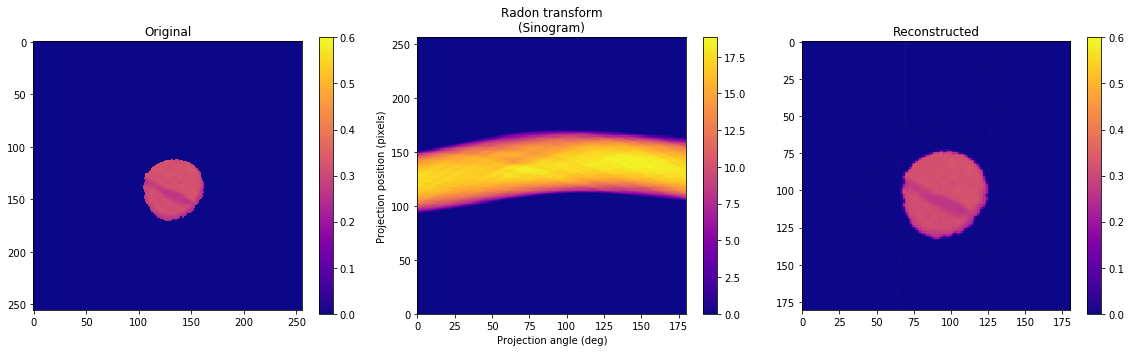

In [70]:
#Code snippet to display the radon transform of the data
#This will be used in the future for data augmentation to add tomographic reconstruction noise

patientID = '02FU1'
imgNum = 100
downsampling = 1

image = imread('student_data_10_17_18/' + patientID + '/images' + "/" + str(imgNum) + ".jpg", as_gray=True)
image = rescale(image, scale=1, mode='reflect')
imageMsk = imread('student_data_10_17_18/' + patientID + '/aorta_masks' + "/" + str(imgNum) + ".png", as_gray=True)
imageMsk = rescale(imageMsk, scale=1, mode='reflect')

imgMsked = image
imgMsked = np.minimum(imgMsked, imageMsk) #comment this out to remove masking

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

ax1.set_title("Original")
origPlot = ax1.imshow(imgMsked, cmap=plt.cm.plasma, vmin=0, vmax=0.6)
fig.colorbar(origPlot, ax=ax1)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
theta = decimate(theta,downsampling)
sinogram = radon(imgMsked, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
radonPlot = ax2.imshow(sinogram, cmap=plt.cm.plasma,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
fig.colorbar(radonPlot, ax=ax2)

recon = iradon(sinogram, theta=theta, circle=False)
ax3.set_title("Reconstructed")
reconPlot = ax3.imshow(recon, cmap=plt.cm.plasma, vmin=0, vmax=0.6)
fig.colorbar(reconPlot, ax=ax3)

fig.tight_layout()
plt.show()